In [1]:
import networkx as nx
import matplotlib.pyplot as plt 
import sys
import gensim, logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

C:\Users\Sony\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [38]:
m = 'ruscorpora_upos_skipgram_300_5_2018.vec.gz'
model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=False)
model.init_sims(replace=True)

2018-05-28 14:17:06,767 : INFO : loading projection weights from ruscorpora_upos_skipgram_300_5_2018.vec.gz
2018-05-28 14:18:32,091 : INFO : loaded (195071, 300) matrix from ruscorpora_upos_skipgram_300_5_2018.vec.gz
2018-05-28 14:18:32,093 : INFO : precomputing L2-norms of word weight vectors


In [89]:
words = ['ездить_VERB', 'слоняться_VERB', 'бродить_VERB', 'ползать_VERB', 'летать_VERB', 'прыгать_VERB', 'шагать_VERB', 'идти_VERB', 'ходить_VERB', 'носиться_VERB', 'скакать_VERB', 'улепетывать_VERB', 'бежать_VERB', 'гулять_VERB', 'падать_VERB', 'носить_VERB']
nwords = ['ездить', 'слоняться', 'бродить', 'ползать', 'летать', 'прыгать', 'шагать', 'идти', 'ходить', 'носиться', 'скакать', 'улепетывать', 'бежать', 'гулять', 'падать', 'носить']
G = nx.Graph()
G.add_nodes_from(nwords)

for i in range(len(words)):
    for j in range(len(words)):
        if(model.similarity(words[i], words[j]) > 0.5):
            G.add_edge(nwords[i], nwords[j])
            
for i in nwords:
    if (G.degree(i) == 2):
        G.remove_node(i)

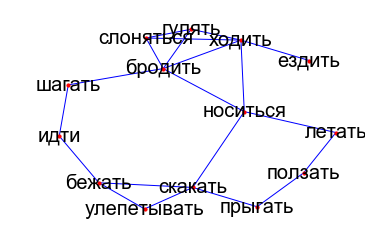

In [91]:
pos=nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_color='red', node_size=10) 
nx.draw_networkx_edges(G, pos, edge_color='blue')
nx.draw_networkx_labels(G, pos, font_size=20, font_family='Arial')
plt.axis('off') 
plt.show()

In [92]:
deg = nx.degree_centrality(G)
n = 0
k = ''
for nodeid in range(len(sorted(deg, key=deg.get, reverse=True))):
    k =  sorted(deg, key=deg.get, reverse=True)[0] + ', ' + sorted(deg, key=deg.get, reverse=True)[1] + ', ' + sorted(deg, key=deg.get, reverse=True)[2]
    break
print('Самые центральные слова графа: ' + k)

Самые центральные слова графа: бродить, ходить, носиться


In [93]:
print('Радиус графа = ' + str(nx.radius(G)))
print('Коэффициент кластеризации графа = ' + str(nx.average_clustering(G)))

Радиус графа = 3
Коэффициент кластеризации графа = 0.3190476190476191
